In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading the Housing price csv file
data = pd.read_csv("housing.csv")

In [3]:
data.shape

(20640, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Dropping the null values from the datasets
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Labeling the X and Y
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [9]:
# Splitting the train and test data
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
X_test.shape

(4087, 9)

In [11]:
train_data  = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

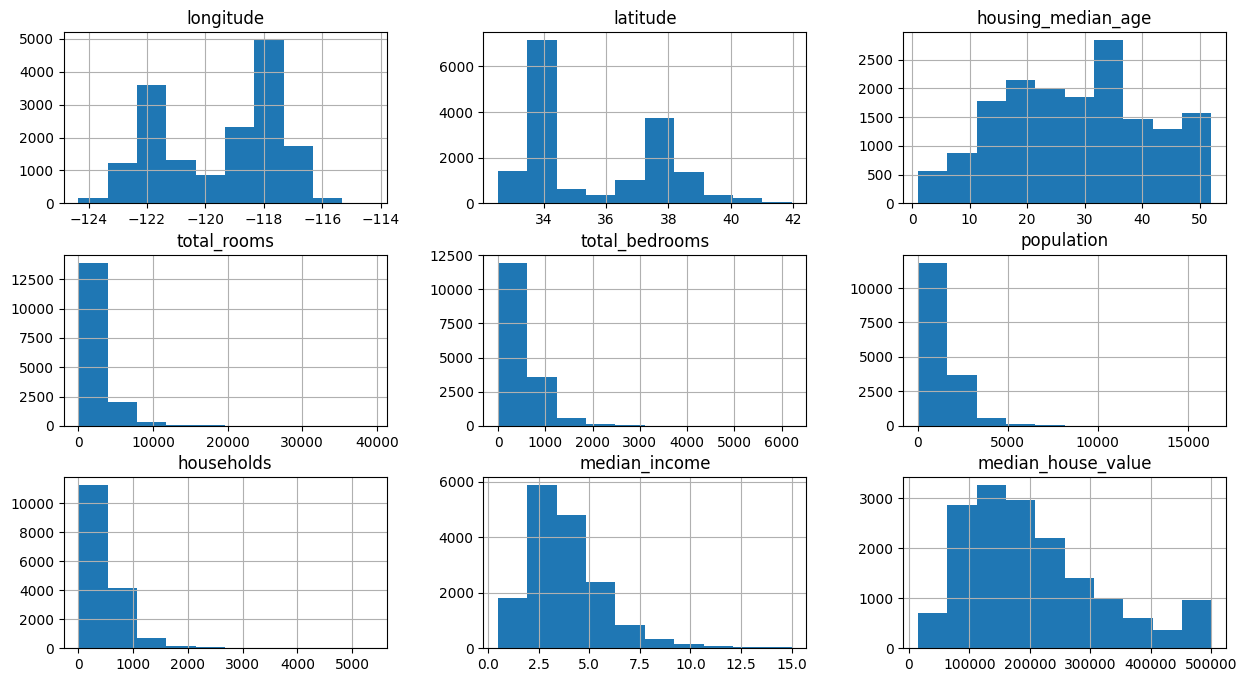

In [12]:
# Analysing the histogram of the training data 
train_data.hist(figsize=(15,8))

C:\Users\nithi\AppData\Local\Temp\ipykernel_5572\3301957712.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')


<Axes: >

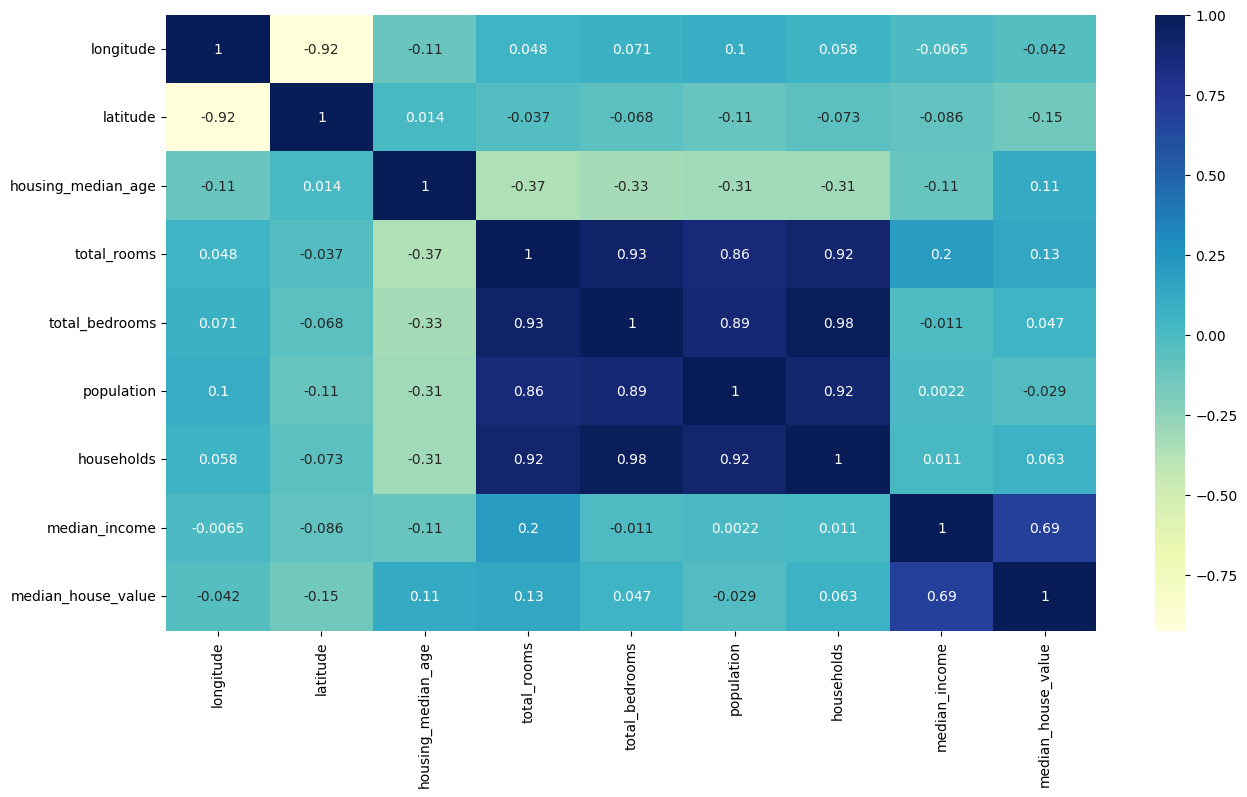

In [13]:
# Analysing the heat map and correlation between features
plt.figure(figsize = [15,8] )
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [14]:
# Normalizing the values of some features 
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [15]:
# No. of categorical values in the feature (ocean_proximity)
train_data.ocean_proximity.value_counts()

<1H OCEAN     7216
INLAND        5194
NEAR OCEAN    2110
NEAR BAY      1822
ISLAND           4
Name: ocean_proximity, dtype: int64

In [16]:
# Converting categorical values to one-hot-encoding
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19206,-122.72,38.47,29.0,7.442493,6.030685,6.898715,5.978886,1.9932,164800.0,1,0,0,0,0
1946,-120.91,38.73,11.0,8.605387,6.756932,7.880804,6.732211,4.8350,230600.0,0,1,0,0,0
10962,-117.88,33.78,26.0,7.503290,6.045005,7.119636,5.840642,3.5972,187500.0,1,0,0,0,0
16737,-122.41,37.70,23.0,7.505492,5.993961,7.227662,5.948035,2.4113,214200.0,0,0,0,1,0
9744,-121.68,36.72,12.0,9.864487,8.410276,9.405414,8.383205,3.2652,152800.0,1,0,0,0,0


<Axes: xlabel='longitude', ylabel='latitude'>

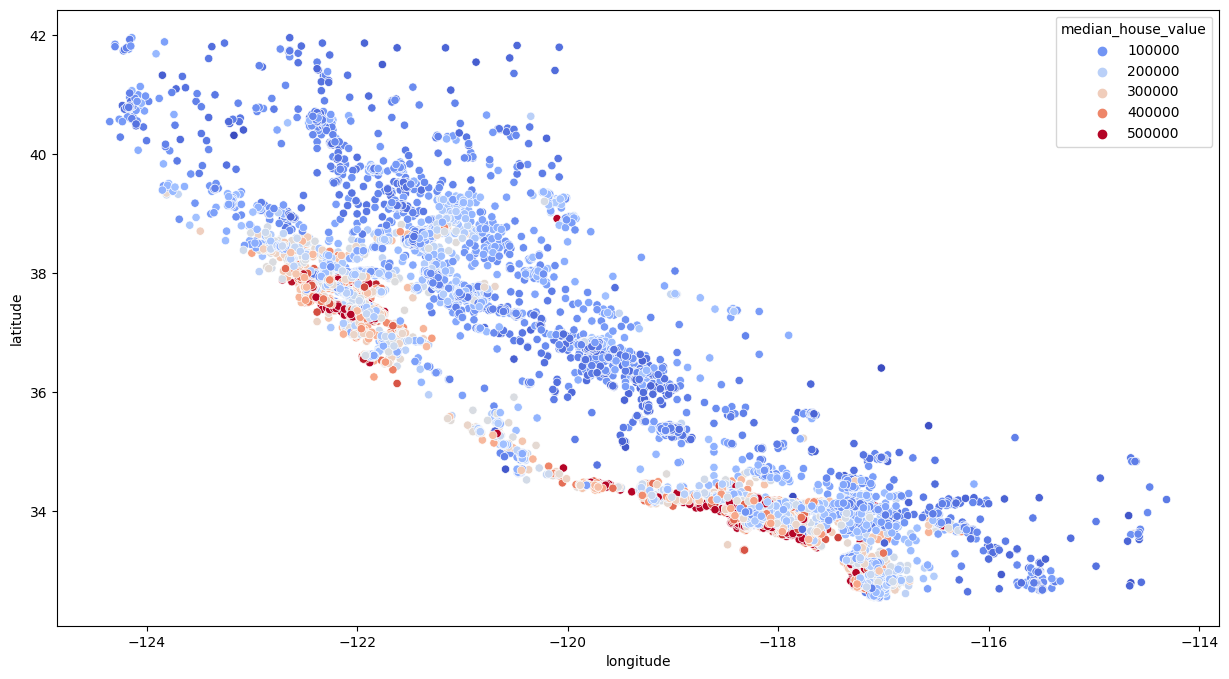

In [17]:
# Visualizing the entire dataset
plt.figure(figsize = [15,8])
sns.scatterplot(x ='longitude', y = 'latitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm')

In [18]:
# Feature Engineering, adding additional featuers to the dataset
train_data['bedrooms_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_ratio'] = train_data['total_rooms'] / train_data['households']

In [19]:
# Scalling the Features, and Training the model or Applying the linear regression.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

reg = LinearRegression()
scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

x_train_s = scaler.fit_transform(x_train)

reg.fit(x_train, y_train)

LinearRegression()

In [20]:
# Pre-processing the test data

X_test['total_rooms'] = np.log(X_test['total_rooms'] + 1)
X_test['total_bedrooms'] = np.log(X_test['total_bedrooms'] + 1)
X_test['population'] = np.log(X_test['population'] + 1)
X_test['households'] = np.log(X_test['households'] + 1)

X_test = X_test.join(pd.get_dummies(X_test.ocean_proximity)).drop(['ocean_proximity'], axis=1)

X_test['bedrooms_ratio'] = X_test['total_bedrooms'] / X_test['total_rooms']
X_test['households_ratio'] = X_test['total_rooms'] / X_test['households']

In [21]:
# Scalling the test data
X_test_s = scaler.transform(X_test)

In [22]:
# Evaluating the model
reg.score(X_test, y_test)

0.6557788522018791